In [1]:
### Import libraries
import igraph as ig
import pandas as pd
import numpy as np

In [12]:
# Load data
# file_name = "../data/IOT-AL-universal.csv"
file_name = "../data/no-uniform/HC-pareto-AMZ-universal.csv"
acc_log = pd.read_csv(file_name)

# Remove first column (is the old index)
acc_log = acc_log[acc_log.columns[1:]]

# Change the uname string values to int values
acc_log = acc_log.replace(acc_log.uname.unique(), range(len(acc_log.uname.unique())))

# Change the resource id
acc_log["rname"] = acc_log["rname"] + max(acc_log.uname.unique()) + 1

print("Done!")
acc_log.head(5)

Done!


,uname,position,uward,specialties,teams,agentfor,type,author,patient,topics,tratingTeam,rward,rname,ACTION
0,0,nurse,oncward,None,None,None,item,16,28,nursing,oncTeam1,oncward,1359,1
1,0,nurse,oncward,None,None,None,item,29,27,none,carTeam1,oncward,2379,0
2,0,nurse,oncward,None,None,None,HR,23,28,none,oncTeam2,oncward,4417,1
3,0,nurse,oncward,None,None,None,item,0,27,cardiology,carTeam2,carward,70,1
4,0,nurse,oncward,None,None,None,item,7,28,none,oncTeam2,carward,658,0


In [20]:
user_attributes = ["position", "uward", "specialties", "teams", "agentfor", "uname"]
users = acc_log[user_attributes].drop_duplicates()
users = users.reset_index(drop=True)
print("|U| =", len(users))
users.head()

|U| = 31


,position,uward,specialties,teams,agentfor,uname
0,nurse,oncward,None,None,None,0
1,nurse,carward,None,None,None,1
2,doctor,None,oncology,oncTeam1,None,2
3,doctor,None,oncology,oncTeam2,None,3
4,doctor,None,oncology,carTeam1,None,4


In [21]:
res_attributes = ["type", "author", "patient", "topics", "tratingTeam", "rward", "rname"]
resrs = acc_log[res_attributes].drop_duplicates()
resrs = resrs.reset_index(drop=True)
print("|R| =", len(resrs))
resrs.head()

|R| = 4934


,type,author,patient,topics,tratingTeam,rward,rname
0,item,16,28,nursing,oncTeam1,oncward,1359
1,item,29,27,none,carTeam1,oncward,2379
2,HR,23,28,none,oncTeam2,oncward,4417
3,item,0,27,cardiology,carTeam2,carward,70
4,item,7,28,none,oncTeam2,carward,658


In [53]:
edges_attributes = ["uname", "rname"]
edges = acc_log[edges_attributes].drop_duplicates()
edges = edges.reset_index(drop=True)
#edges["weight"] = edges.value_counts(edges_attributes, normalize=True).values
edges

,uname,rname
0,0,1359
1,0,2379
2,0,4417
3,0,70
4,0,658
...,...,...
34947,30,4965
34948,30,1218
34949,30,1181
34950,30,2705


In [77]:
test = edges.value_counts(edges_attributes, normalize=True, ascending=True).keys()
test

MultiIndex([( 0,   33),
            (24, 1147),
            (24, 1145),
            (24, 1144),
            (24, 1143),
            (24, 1142),
            (24, 1141),
            (24, 1140),
            (24, 1139),
            (24, 1138),
            ...
            (15,  193),
            (15,  495),
            (15,  500),
            (15,  503),
            (15,  505),
            (15,  506),
            (15,  509),
            (15,  510),
            (15,  499),
            (30, 4986)],
           names=['uname', 'rname'], length=34952)

In [82]:
acc_log.value_counts(["uname", "rname"], normalize=True).values

array([9.78421480e-03, 4.99860226e-03, 4.89210740e-03, ...,
       6.65592844e-06, 6.65592844e-06, 6.65592844e-06])

In [80]:
acc_log.value_counts(["uname", "rname"], normalize=True).keys()

MultiIndex([(30, 2502),
            (30, 2501),
            (30, 2499),
            (30, 2500),
            (30, 2497),
            (30, 2498),
            (29, 2502),
            (28, 2502),
            (30, 2496),
            (30, 2460),
            ...
            (22, 3914),
            (22, 3930),
            (12, 1137),
            (22, 3951),
            (12, 1135),
            (22, 3973),
            (22, 3978),
            (12, 1132),
            (22, 3996),
            ( 0,   33)],
           names=['uname', 'rname'], length=34952)

In [81]:
acc_log.value_counts(["uname", "rname"], normalize=True)

uname  rname
30     2502     0.009784
       2501     0.004999
       2499     0.004892
       2500     0.003887
       2497     0.003641
                  ...   
22     3973     0.000007
       3978     0.000007
12     1132     0.000007
22     3996     0.000007
0      33       0.000007
Length: 34952, dtype: float64

In [61]:
edges.value_counts(edges_attributes, normalize=True)

uname  rname
0      33       0.000029
24     1140     0.000029
       1133     0.000029
       1134     0.000029
       1135     0.000029
                  ...   
15     490      0.000029
       489      0.000029
       488      0.000029
       481      0.000029
30     4986     0.000029
Length: 34952, dtype: float64

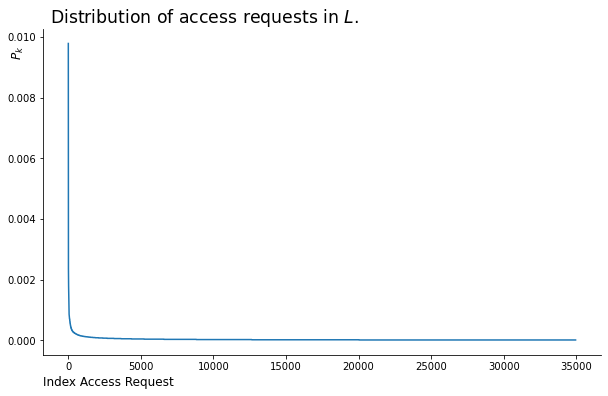

In [78]:
### Selection only user-resource access requests
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines[['right', 'top']].set_visible(False)
#to_plot = acc_log.value_counts(["uname", "rname", "op", "location", "timeday"], normalize=False)
to_plot = acc_log.value_counts(["uname", "rname"], normalize=True)
ax.plot(range(len(to_plot)), to_plot)
ax.set_xlabel('Index Access Request', loc="left", size="large")
ax.set_ylabel('$P_k$', loc="top", size="large", parse_math=True)
ax.yaxis.set_label_coords(-0.03,0.95)
ax.set_title("Distribution of access requests in $L$.", size="xx-large", x=0.29, y=1, parse_math=True)
plt.show()

In [ ]:
edges_attributes = ["uname", "rname"]
edges = acc_log[edges_attributes].drop_duplicates()
edges = edges.reset_index(drop=True)
edges["weight"] = np.round(np.random.random(len(edges)), 2)
print("|E| =", len(edges))
edges.head()

In [86]:
edges.columns[:].tolist()

['uname', 'rname']

In [96]:
list(acc_log_freq.keys())

[(30, 2502),
 (30, 2501),
 (30, 2499),
 (30, 2500),
 (30, 2497),
 (30, 2498),
 (29, 2502),
 (28, 2502),
 (30, 2496),
 (30, 2460),
 (30, 2461),
 (30, 2495),
 (30, 2459),
 (30, 2458),
 (27, 2502),
 (30, 2457),
 (30, 2418),
 (29, 2499),
 (30, 2419),
 (26, 2502),
 (29, 2501),
 (30, 2462),
 (30, 2455),
 (30, 2456),
 (24, 2502),
 (28, 2501),
 (29, 2500),
 (30, 2421),
 (30, 2420),
 (25, 2502),
 (30, 2422),
 (23, 2502),
 (28, 2500),
 (30, 2379),
 (28, 2499),
 (22, 2502),
 (29, 2497),
 (30, 2381),
 (21, 2502),
 (20, 2502),
 (28, 2497),
 (30, 2416),
 (27, 2500),
 (26, 2501),
 (30, 2410),
 (30, 2413),
 (30, 2380),
 (18, 2502),
 (25, 2500),
 (29, 2498),
 (29, 2462),
 (30, 2378),
 (30, 2375),
 (26, 2500),
 (30, 2417),
 (30, 2415),
 (30, 2488),
 (19, 2502),
 (27, 2501),
 (29, 2496),
 (30, 2492),
 (24, 2501),
 (25, 2499),
 (27, 2499),
 (30, 2408),
 (26, 2499),
 (30, 2331),
 (30, 2494),
 (30, 2487),
 (26, 2496),
 (30, 2409),
 (28, 2495),
 (30, 2376),
 (30, 2377),
 (29, 2461),
 (25, 2501),
 (24, 2500),

In [98]:
test = pd.DataFrame(list(acc_log_freq.keys()), columns=["uname", "rname"])
test["weight"] = acc_log_freq.values
test

,uname,rname,weight
0,30,2502,0.009784
1,30,2501,0.004999
2,30,2499,0.004892
3,30,2500,0.003887
4,30,2497,0.003641
...,...,...,...
34947,22,3973,0.000007
34948,22,3978,0.000007
34949,12,1132,0.000007
34950,22,3996,0.000007


In [100]:
### Create a graph

# Iteration over tuples in the dataframe
# acc_log_freq = acc_log.value_counts(["uname", "rname"], normalize=True)
tuple_list = test.itertuples(index=False)

# Using the TupleList method to build the network
bip_network = ig.Graph.TupleList(tuple_list, directed=False,
                                 weights=True)


print(bip_network.summary())

# Check if it is a bipartite network
if bip_network.is_bipartite():
    print("It is bipartite!")
else:
    print("The network is not bipartite.")

IGRAPH UNW- 4965 34952 -- 
+ attr: name (v), weight (e)
It is bipartite!


In [156]:
def totalMoney(n: int):
    #print(n%7)
    loops = n//7 
    print(loops)
    csum = 0
    while loops>=0:
        mod_value = n%7
        if mod_value == 0:
            mod_value = 7
        
        if loops == 0:
            csum += sum(range(1+loops ,mod_value+loops+1))
            print(list(range(1+loops ,mod_value+loops+1)))
        else:
            csum += sum(range(1+loops ,8+loops))
            print(list(range(1+loops ,8+loops)))
        
        loops -= 1
        print(csum, loops)
    return csum
    


totalMoney(10)

1
[2, 3, 4, 5, 6, 7, 8]
35 0
[1, 2, 3]
41 -1


41

In [1]:
def new_weighted_projection(u, v, uv):
    return ( sum(uv) / sum(u)) * (sum(uv) / sum(v))

In [7]:
(0.11/0.11) * (0.03/(0.03+0.1+0.05+0.06))

0.125

In [8]:
( (0.03+0.05) / (0.03+0.05) ) * ( (0.03+0.1)/ (0.03+0.1+0.05+0.06) )

0.5416666666666667

In [14]:
( (0.05) / (0.03+0.05) ) * ( (0.05) / (0.05+0.08) )

0.2403846153846154

In [15]:
( (0.02) / (0.02+0.08) ) * ( (0.05) / (0.05+0.08) )

0.07692307692307693

In [17]:
( (0.02+0.08) / (0.02+0.08) ) * ( (0.06+0.1) / (0.03+0.1+0.05+0.06) )

0.6666666666666667

In [18]:
( (0.05+0.06) / (0.05+0.06) ) * ( (0.06+0.1) / (0.03+0.1+0.05+0.06) )

0.6666666666666667

In [20]:
1 * ( (0.05) / (0.03+0.1+0.05+0.06) )

0.20833333333333334

In [121]:
n = 10
n//7, n%7

(1, 3)

In [126]:
sum(list(range(1, 8)))

28

In [128]:
sum(range(2, 9))

35

In [101]:
### Add user attributes

# Add type of node:     0=User      1=Resource
user_nodes = bip_network.vs.select(name_le=max(users.uname.unique()))
resource_nodes = bip_network.vs.select(name_gt=max(users.uname.unique()))
user_nodes["type"] = 0
resource_nodes["type"] = 1

# Add attributes
for attr in user_attributes[:-1]:   # User attributes
    user_nodes[attr] = users[attr]
for attr in res_attributes[:-1]:    # Resource attributes
    resource_nodes[attr] = resrs[attr]

# Remove objecto to free memory
del user_nodes, resource_nodes

In [102]:

print(bip_network.summary())

IGRAPH UNWT 4965 34952 -- 
+ attr: agentfor (v), author (v), name (v), patient (v), position (v), rward (v), specialties (v), teams (v), topics (v), tratingTeam (v), type (v), uward (v), weight (e)


## IoT

In [3]:
user_attributes = ["role", "age", "health", "uname"]
users = acc_log[user_attributes].drop_duplicates()
users = users.reset_index(drop=True)
print("|U| =", len(users))
users.head()

|U| = 120


,role,age,health,uname
0,child,3,health,0
1,child,3,anormal,1
2,child,3,emergency,2
3,child,5,health,3
4,child,5,anormal,4


In [4]:
res_attributes = ["area", "mode", "temperature", "lockstatus", "rname"]
resrs = acc_log[res_attributes].drop_duplicates()
resrs = resrs.reset_index(drop=True)
print("|R| =", len(resrs))
resrs.head()

|R| = 990


,area,mode,temperature,lockstatus,rname
0,livingroom,armed,-10,locked,123
1,livingroom,armed,-10,unlocked,124
2,livingroom,armed,-5,locked,125
3,livingroom,armed,-5,unlocked,126
4,livingroom,armed,0,locked,127


In [5]:
edges_attributes = ["uname", "rname", "location", "timeday", "op", "ACTION"]
edges = acc_log[edges_attributes].drop_duplicates()
edges = edges.reset_index(drop=True)
edges["weight"] = np.round(np.random.random(len(edges)), 2)
print("|E| =", len(edges))
edges.head()

|E| = 5702400


,uname,rname,location,timeday,op,ACTION,weight
0,0,123,livingroom,day,access,1,0.17
1,0,123,livingroom,day,control,1,0.05
2,0,123,livingroom,day,arm,1,0.54
3,0,123,livingroom,midday,access,1,0.61
4,0,123,livingroom,midday,control,1,0.16


In [6]:
### Create a graph

# Iteration over tuples in the dataframe
tuple_list = edges.itertuples(index=False)

# Using the TupleList method to build the network
bip_network = ig.Graph.TupleList(tuple_list, directed=False,
                                 edge_attrs=edges.columns[2:].tolist())


print(bip_network.summary())

# Check if it is a bipartite network
if bip_network.is_bipartite():
    print("It is bipartite!")
else:
    print("The network is not bipartite.")

IGRAPH UNW- 1110 5702400 -- 
+ attr: name (v), ACTION (e), location (e), op (e), timeday (e), weight (e)
It is bipartite


In [26]:
### Add user attributes

# Add type of node:     0=User      1=Resource
user_nodes = bip_network.vs.select(name_le=max(users.uname.unique()))
resource_nodes = bip_network.vs.select(name_gt=max(users.uname.unique()))
user_nodes["type"] = 0
resource_nodes["type"] = 1

# Add attributes
for attr in user_attributes[:-1]:   # User attributes
    user_nodes[attr] = users[attr]
for attr in res_attributes[:-1]:    # Resource attributes
    resource_nodes[attr] = resrs[attr]

# Remove objecto to free memory
del user_nodes, resource_nodes

In [78]:
# Save the graph
bip_network.write("iot_bip_graph.graphml")